<a href="https://colab.research.google.com/github/VctrEman/Clustering/blob/main/RFM_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RFM
https://stackoverflow.com/questions/65659914/convert-a-column-with-a-week-number-to-a-date
df['date'] = df.apply(lambda x: date(x.year,1,1) + relativedelta(weeks=-int(x.week)), axis=1)

In [ ]:
! pip install dataprep

     |████████████████████████████████| 1.8 MB 13.2 MB/s 
     |████████████████████████████████| 366 kB 69.5 MB/s 
     |████████████████████████████████| 50 kB 5.3 MB/s 
     |████████████████████████████████| 719 kB 71.5 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 848 kB 73.2 MB/s 
     |████████████████████████████████| 1.3 MB 62.9 MB/s 
     |████████████████████████████████| 1.5 MB 49.9 MB/s 
     |████████████████████████████████| 10.1 MB 47.3 MB/s 
     |████████████████████████████████| 294 kB 71.0 MB/s 
     |████████████████████████████████| 142 kB 74.6 MB/s 
     |████████████████████████████████| 123 kB 63.1 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 743 kB 86.1 MB/s 
  Created wheel for metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13919 sha256=f31cbd13f6efa063a64ddf3076b3c535bd41ad773877c9e8869f4908b8223a78
  Stored in directory: /root/.cache/pip

#Transformation

In [ ]:
! wget 'https://raw.githubusercontent.com/daniel-isidro/customer_segmentation/main/data/sales_asia.csv'

--2021-09-26 11:30:24--  https://raw.githubusercontent.com/daniel-isidro/customer_segmentation/main/data/sales_asia.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6965878 (6.6M) [text/plain]
Saving to: ‘sales_asia.csv’

sales_asia.csv      100%[===================>]   6.64M  --.-KB/s    in 0.04s   

2021-09-26 11:30:24 (178 MB/s) - ‘sales_asia.csv’ saved [6965878/6965878]



In [ ]:
import pandas as pd
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (20, 5)

In [ ]:
df = pd.read_csv('sales_asia.csv', sep = ';', dtype={'week.year': str},)
df.revenue = df.revenue.str.replace(",", ".").astype(float)
df.rename({'revenue': 'monetary','id':'customer_id'}, axis=1, inplace=True)
df.head()

,country,customer_id,week.year,monetary,units
0,KR,702234,03.2019,808.08,1
1,KR,702234,06.2019,1606.80,2
2,KR,3618438,08.2019,803.40,1
3,KR,3618438,09.2019,803.40,1
4,KR,3618438,09.2019,803.40,1


In [ ]:
# Splitting 'week.year' column on '.' and creating 'week' and 'year' columns
df[['week', 'year']] = df['week.year'].astype(str).str.rsplit(".", expand=True)
df['date'] = pd.to_datetime(df['year'].map(str) + df['week'].map(str) + '-1', format='%Y%W-%w')
df = df.drop(columns=['week.year','year','week'],axis = 1)

print(df['date'].min(),df['date'].max())
df.tail()

2019-01-07 00:00:00 2020-11-30 00:00:00


,country,customer_id,monetary,units,date
235569,CN,2452476,41160.0,200,2020-07-06
235570,CN,2452476,50856.0,400,2020-07-06
235571,CN,2452476,79920.0,1200,2020-07-06
235572,CN,4553904,4788.0,100,2020-07-06
235573,CN,4553904,4188.0,100,2020-07-06


In [ ]:
df2 = df.copy()
df2.set_index("date", inplace=False)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235574 entries, 0 to 235573
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   country      235574 non-null  object        
 1   customer_id  235574 non-null  int64         
 2   monetary     235574 non-null  float64       
 3   units        235574 non-null  int64         
 4   date         235574 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 9.0+ MB


In [ ]:
df2.head()

,country,customer_id,monetary,units,date
0,KR,702234,808.08,1,2019-01-21
1,KR,702234,1606.80,2,2019-02-11
2,KR,3618438,803.40,1,2019-02-25
3,KR,3618438,803.40,1,2019-03-04
4,KR,3618438,803.40,1,2019-03-04


In [ ]:
from dataprep.clean import clean_country
clean_country(df, "country")['country_clean'].unique()

Country Cleaning Report:
	235574 values cleaned (100.0%)
Result contains 235574 (100.0%) values in the correct format and 0 null values (0.0%)


array(['South Korea', 'Pakistan', 'Myanmar', 'Vietnam', 'India',
       'Saudi Arabia', 'Philippines', 'Afghanistan', 'China',
       'Bangladesh', 'Indonesia', 'Thailand', 'Iraq', 'Malaysia', 'Japan',
       'Iran', 'Turkey', 'Uzbekistan'], dtype=object)

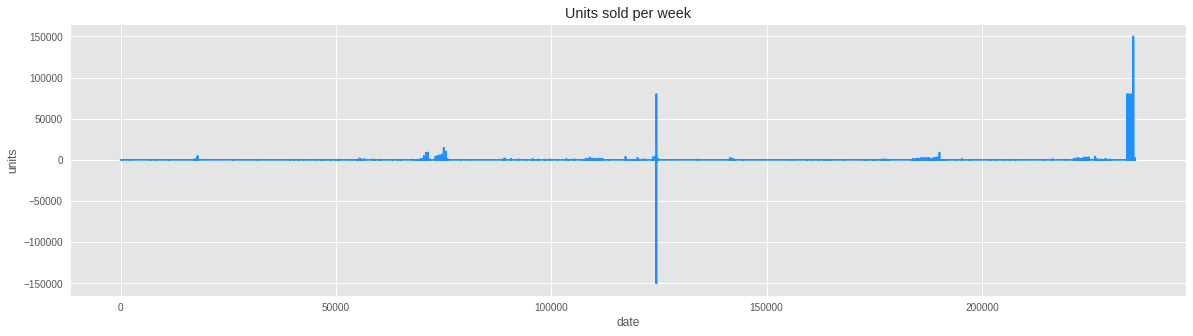

In [ ]:
plt.style.use('ggplot')
plt.title('Units sold per week')
plt.ylabel('units')
plt.xlabel('date');
df2['units'].plot(figsize=(20,5), c='dodgerblue')

In [ ]:
df2.set_index("date", inplace=True)
df2 = df2.to_period("M").copy()

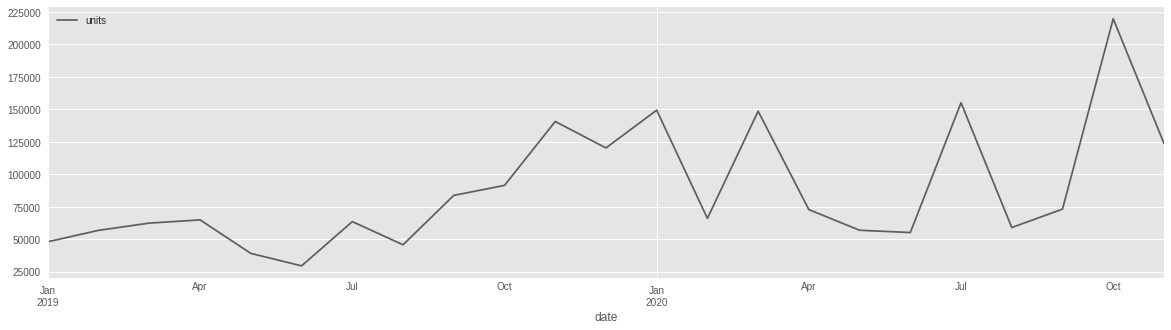

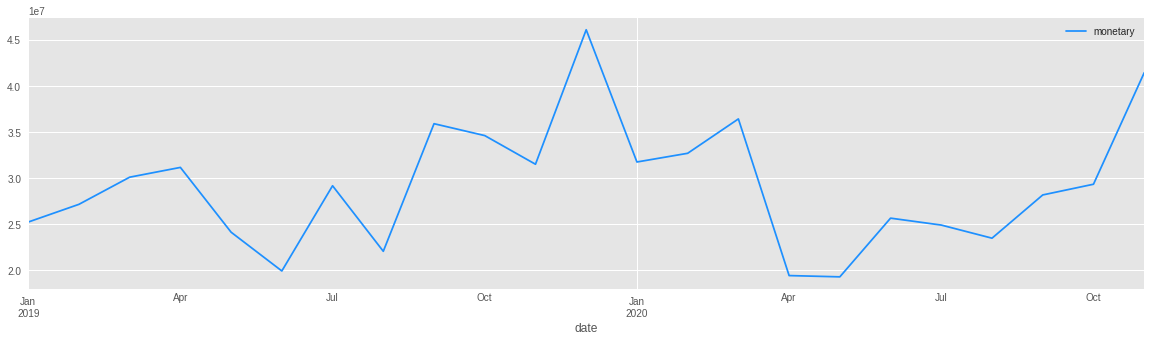

In [ ]:
# agg sum monetary and units by date
df2.groupby(df2.index)[['units']].agg(sum).plot(figsize=(20,5), c= '#625D5D');
df2.groupby(df2.index)[['monetary',]].agg(sum).plot(figsize=(20,5), c='dodgerblue');

In [ ]:
df3 = df.copy()
df3.head()

,country,customer_id,monetary,units,date
0,KR,702234,808.08,1,2019-01-21
1,KR,702234,1606.80,2,2019-02-11
2,KR,3618438,803.40,1,2019-02-25
3,KR,3618438,803.40,1,2019-03-04
4,KR,3618438,803.40,1,2019-03-04


#Modelagem RFM

In [ ]:
#new unique identifier for customers
period = 365
date_N_days_ago = df3['date'].max() - timedelta(days=period)

# We remove the rows with dates older than 365 days ago
df3 = df3.loc[df3['date']> date_N_days_ago]

df3['id+'] = df3['country'].map(str) + df3['customer_id'].map(str)
df3.head()

,country,customer_id,monetary,units,date,id+,recency,days_since_purchase
38,KR,4375152,773.58,1,2019-12-16,KR4375152,351 days,351
75,KR,705462,337.26,1,2019-12-09,KR705462,358 days,358
76,KR,705462,337.26,1,2019-12-23,KR705462,344 days,344
77,KR,705462,421.56,2,2019-12-16,KR705462,351 days,351
78,KR,706854,391.50,1,2019-12-09,KR706854,358 days,358


In [ ]:
import numpy as np
NOW = df3['date'].max() + timedelta(days=1)

In [ ]:
df3['days_since_purchase'] = df3['date'].apply(lambda x:(NOW - x).days) 
df3.tail()

,country,customer_id,monetary,units,date,id+,recency,days_since_purchase
235569,CN,2452476,41160.0,200,2020-07-06,CN2452476,148 days,148
235570,CN,2452476,50856.0,400,2020-07-06,CN2452476,148 days,148
235571,CN,2452476,79920.0,1200,2020-07-06,CN2452476,148 days,148
235572,CN,4553904,4788.0,100,2020-07-06,CN4553904,148 days,148
235573,CN,4553904,4188.0,100,2020-07-06,CN4553904,148 days,148


In [ ]:
df3[df3['id+']=='KR706854']

,country,customer_id,monetary,units,date,id+,recency,days_since_purchase
78,KR,706854,391.50,1,2019-12-09,KR706854,358 days,358
79,KR,706854,388.68,1,2019-12-30,KR706854,337 days,337
125098,KR,706854,369.66,1,2020-04-06,KR706854,239 days,239
125121,KR,706854,374.76,1,2020-07-27,KR706854,127 days,127
125139,KR,706854,371.82,1,2020-11-09,KR706854,22 days,22


In [ ]:
# Recency will be the minimum of 'days_since_last_purchase' for each customer
# Frequency will be the total number of orders in the period for each customer

aggr = {
    'days_since_purchase': lambda x:x.min(),                                        #lambda min of datediff
    'date': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)])      #lambda len(number of dates on date if date <365)
}
aggr

{'date': <function __main__.<lambda>>,
 'days_since_purchase': <function __main__.<lambda>>}

In [ ]:
rfm = df3.groupby(['customer_id', 'id+', 'country']).agg(aggr).reset_index()
rfm.rename(columns={'days_since_purchase': 'recency','date': 'frequency'},inplace=True)
rfm

,customer_id,id+,country,recency,frequency
0,600018,CN600018,CN,29,7
1,600060,CN600060,CN,155,1
2,600462,CN600462,CN,211,2
3,600888,CN600888,CN,8,3
4,601014,CN601014,CN,225,1
...,...,...,...,...,...
16564,241575552,IQ241575552,IQ,15,1
16565,241794972,IQ241794972,IQ,351,1
16566,241888554,IQ241888554,IQ,43,1
16567,241900254,IQ241900254,IQ,8,62


In [ ]:
rfm.loc[rfm['customer_id']==3790218]

,customer_id,id+,country,recency,frequency
11057,3790218,AF3790218,AF,309,1
11058,3790218,BD3790218,BD,176,4
11059,3790218,CN3790218,CN,1,60
11060,3790218,ID3790218,ID,260,9
11061,3790218,IQ3790218,IQ,176,1
11062,3790218,MM3790218,MM,183,3
11063,3790218,PH3790218,PH,127,3
11064,3790218,PK3790218,PK,43,5
11065,3790218,TH3790218,TH,295,1
11066,3790218,TR3790218,TR,29,10


In [ ]:
df3.loc[df3['date'] >= NOW - timedelta(days=period)].groupby('id+')['monetary'].sum()

id+
AF186035892       277.86
AF1915092      250651.86
AF1915920        2238.60
AF1916280         612.78
AF1917144       29793.18
                 ...    
VN991620         1093.86
VN993528         1018.86
VN993996         4037.28
VN995010          544.32
VN998130          384.84
Name: monetary, Length: 16569, dtype: float64

In [ ]:
 rfm['monetary'] = rfm['id+'].apply(lambda x: df3.loc[ (df3['id+'] == x) & (df3['date'] >= NOW - timedelta(days=period))]\
                  .groupby(['customer_id', 'country']).sum().iloc[0,0])

In [ ]:
print(rfm.loc[rfm['monetary']==rfm['monetary'].max()])
print(rfm[rfm['frequency']==rfm['frequency'].max()])
rfm.head()

     customer_id       id+ country  recency  frequency     monetary
173       638544  CN638544      CN        1        217  21482332.56
      customer_id        id+ country  recency  frequency    monetary
8290      3249114  TR3249114      TR        1       1351  2731448.04


,customer_id,id+,country,recency,frequency,monetary
0,600018,CN600018,CN,29,7,21402.78
1,600060,CN600060,CN,155,1,1201.14
2,600462,CN600462,CN,211,2,2033.64
3,600888,CN600888,CN,8,3,2335.80
4,601014,CN601014,CN,225,1,230.52


In [ ]:
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()

In [ ]:
quintiles

{'frequency': {0.2: 1.0, 0.4: 2.0, 0.6: 4.0, 0.8: 9.0},
 'monetary': {0.2: 967.5,
  0.4: 2212.2,
  0.6: 4852.548000000001,
  0.8: 13957.500000000005},
 'recency': {0.2: 15.0, 0.4: 50.0, 0.6: 120.0, 0.8: 239.0}}